# DECLARAMOS LAS LIBRERIAS #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# CALCULAMOS LOS VALORES PARA CADA INTERVALO DE TIEMPO 

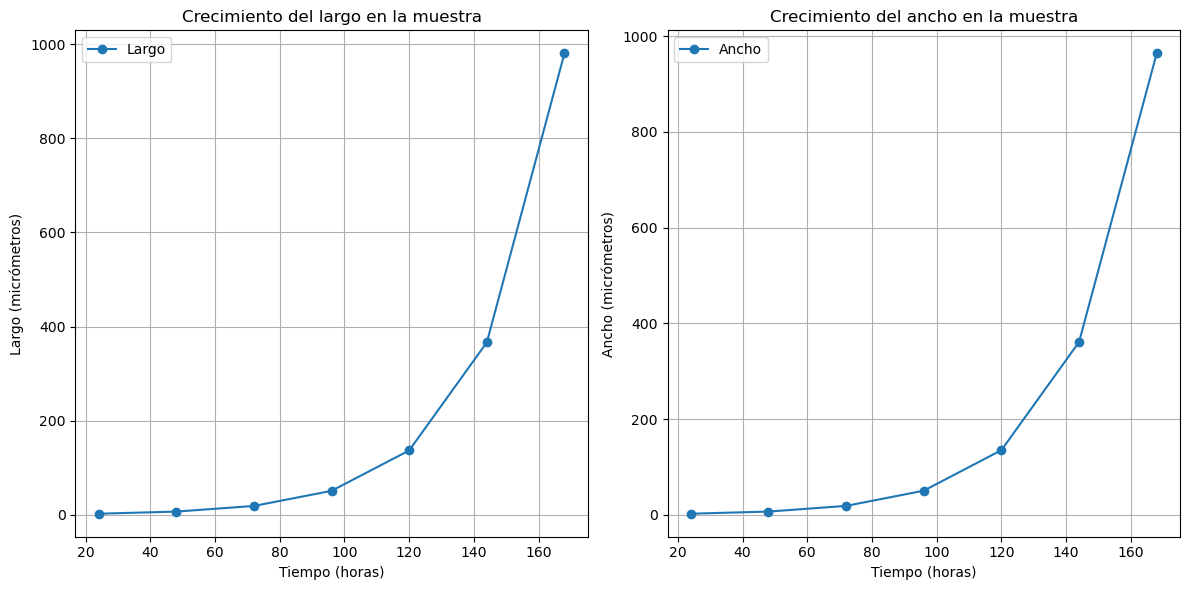

Tiempo: 24 horas -> Largo: 2.68 µm, Ancho: 2.67 µm
Tiempo: 48 horas -> Largo: 7.16 µm, Ancho: 7.12 µm
Tiempo: 72 horas -> Largo: 19.14 µm, Ancho: 19.01 µm
Tiempo: 96 horas -> Largo: 51.21 µm, Ancho: 50.72 µm
Tiempo: 120 horas -> Largo: 137.00 µm, Ancho: 135.37 µm
Tiempo: 144 horas -> Largo: 366.50 µm, Ancho: 361.26 µm
Tiempo: 168 horas -> Largo: 980.44 µm, Ancho: 964.10 µm


In [2]:
# Datos iniciales
largo_inicial = 1  # en micrómetros
ancho_inicial = 1  # en micrómetros

# Tasa de crecimiento específica (supongamos una tasa de crecimiento)
mu_largo = 0.0410  # puedes ajustar este valor según tus datos experimentales
mu_ancho = 0.0409  # puedes ajustar este valor según tus datos experimentales

# Tiempos de medición (en horas)
tiempos = np.array([24, 48, 72, 96, 120, 144, 168])

# Función de crecimiento exponencial
def crecimiento_exponencial(inicial, mu, tiempos):
    return inicial * np.exp(mu * tiempos)

# Calcular largos y anchos en cada tiempo
largos = crecimiento_exponencial(largo_inicial, mu_largo, tiempos)
anchos = crecimiento_exponencial(ancho_inicial, mu_ancho, tiempos)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfico para largos
plt.subplot(1, 2, 1)
plt.plot(tiempos, largos, 'o-', label='Largo')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Largo (micrómetros)')
plt.title('Crecimiento del largo en la muestra')
plt.legend()
plt.grid(True)

# Gráfico para anchos
plt.subplot(1, 2, 2)
plt.plot(tiempos, anchos, 'o-', label='Ancho')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Ancho (micrómetros)')
plt.title('Crecimiento del ancho en la muestra')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar resultados
for dimensiones in list(zip(tiempos,largos, anchos)):
    tiempo, largo, ancho = dimensiones
    print(f"Tiempo: {tiempo} horas -> Largo: {largo:.2f} µm, Ancho: {ancho:.2f} µm")


# DEFINIMOS LOS PARAMETROS PARA LAS GRÁFICAS

In [3]:
# Definir los parámetros de los esferoides
# Datos iniciales
c1 = 700.31 # Distancia desde el centro hasta el polo del primer esferoide(Largo)
a1 = 584.17 # Semieje ecuatorial del primer esferoide(Ancho)

c2 = largos[6]# Distancia desde el centro hasta el polo del segundo esferoide(Largo)
a2 = anchos[6]# Semieje ecuatorial del segundo esferoide(Ancho)

In [4]:
# Crear valores para los ángulos phi y theta
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)

In [5]:
# Calcular las coordenadas cartesianas de los dos esferoides
x1 = a1 * np.outer(np.cos(phi), np.sin(theta))
y1 = a1 * np.outer(np.sin(phi), np.sin(theta))
z1 = c1 * np.outer(np.ones(np.size(phi)), np.cos(theta))

x2 = a2 * np.outer(np.cos(phi), np.sin(theta))
y2 = a2 * np.outer(np.sin(phi), np.sin(theta))
z2 = c2 * np.outer(np.ones(np.size(phi)), np.cos(theta))

# GRAFICO UNO SOBRE OTRO

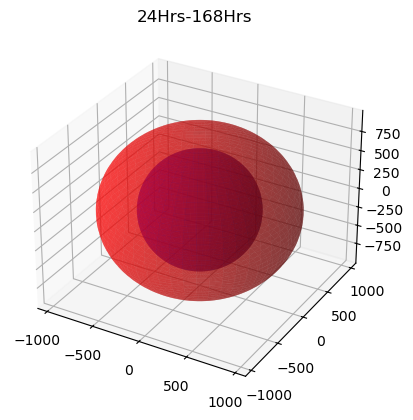

In [6]:
# Crear la figura y los ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los dos esferoides
ax.plot_surface(x1, y1, z1, color='b', alpha=0.5)
ax.plot_surface(x2, y2, z2, color='r', alpha=0.5)

# Ajustar la relación de aspecto de los ejes
ax.set_aspect('auto')
ax.set_title('24Hrs-168Hrs')

# Mostrar el gráfico
plt.show()


# GRAFICO INICIO-FINAL

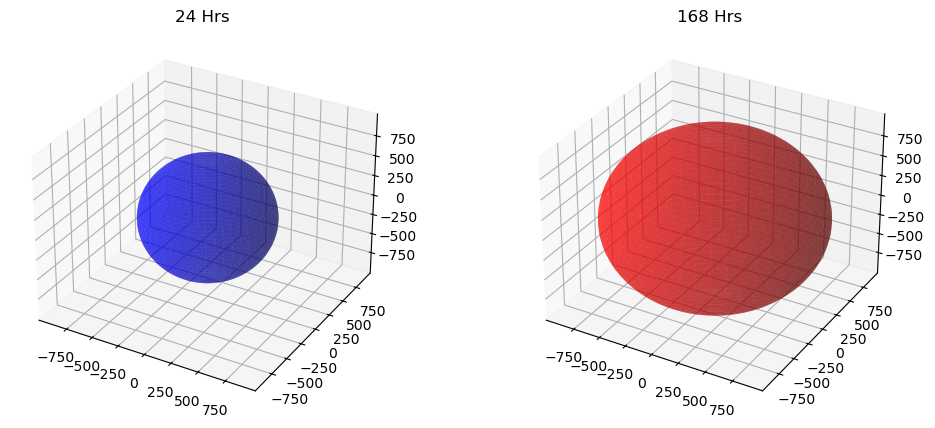

In [7]:
#Encontrar limites inferiores y maximos
max_lim = max(np.max(x1), np.max(y1), np.max(z1), np.max(x2), np.max(y2), np.max(z2))
min_lim = min(np.min(x1), np.min(y1), np.min(z1), np.min(x2), np.min(y2), np.min(z2))

# Crear las figuras y los ejes 3D
fig = plt.figure(figsize=(12, 5))

# Subgráfico 1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x1, y1, z1, color='b', alpha=0.5)
ax1.set_title('24 Hrs')
ax1.set_xlim(min_lim, max_lim)
ax1.set_ylim(min_lim, max_lim)
ax1.set_zlim(min_lim, max_lim)


# Subgráfico 2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x2, y2, z2, color='r', alpha=0.5)
ax2.set_title('168 Hrs')
ax2.set_xlim(min_lim, max_lim)
ax2.set_ylim(min_lim, max_lim)
ax2.set_zlim(min_lim, max_lim)

# Mostrar los gráficos
plt.show()

# GRAFICA DE INTERPOLADO 24-168

En el análisis numérico, se denomina interpolación a obtención de nuevos puntos partiendo del conocimiento de un conjunto de puntos.

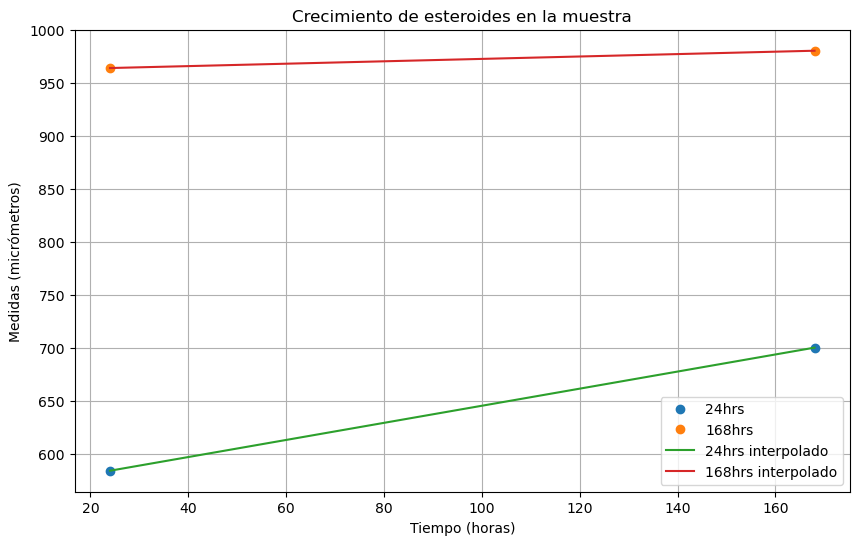

Tiempo: 24 horas -> Largo: 584.17 µm, Ancho: 964.10 µm
Tiempo: 168 horas -> Largo: 603.53 µm, Ancho: 966.83 µm


In [8]:
tiempos = np.array([24, 168])  # tiempos en horas
medidas_1 = np.array([a1, c1])  # largo 1 en micrómetros
medidas_2 = np.array([a2, c2])  # largo 2 en micrómetros

# Interpolación lineal para encontrar largos intermedios
tiempos_intermedios = np.array([24, 48, 72, 96, 120, 144, 168])  # tiempos intermedios

# Funciones de interpolación lineal
interp_medidas_1 = np.interp(tiempos_intermedios, tiempos, medidas_1)
interp_medidas_2 = np.interp(tiempos_intermedios, tiempos, medidas_2)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(tiempos, medidas_1, 'o', label='24hrs')
plt.plot(tiempos, medidas_2, 'o', label='168hrs')
plt.plot(tiempos_intermedios, interp_medidas_1, '-', label='24hrs interpolado')
plt.plot(tiempos_intermedios, interp_medidas_2, '-', label='168hrs interpolado')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Medidas (micrómetros)')
plt.title('Crecimiento de esteroides en la muestra')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar resultados
for dimensiones in list(zip(tiempos,interp_medidas_1, interp_medidas_2)):
    tiempo, largo, ancho = dimensiones
    print(f"Tiempo: {tiempo} horas -> Largo: {largo:.2f} µm, Ancho: {ancho:.2f} µm")
    